In [15]:
import numpy as np
import data, helper
from datetime import datetime, timedelta
import plotting
import text_analysis
from IPython.display import display, HTML
%matplotlib inline

In [16]:
report_to_date = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
report_from_date = report_to_date - timedelta(weeks=4)
week_before = report_to_date - timedelta(weeks=1)
two_weeks_before = report_to_date - timedelta(weeks=2)
#week_before, two_weeks_before

In [17]:
mongo_query = {"date": {'$gt': report_from_date, '$lt': report_to_date}}

In [18]:
df = data.get_data(query=mongo_query)
df.loc[df.date > week_before, 'period'] = 'last week'
df.loc[(df.date < week_before) & (df.date > two_weeks_before), 'period'] = 'previous week'

In [19]:
count_last_week = len(df[df['period']=='last week'].rating)
count_previous_week = len(df[df['period']=='previous week'].rating)
mean_last_week = round(np.nanmean(df[df['period']=='last week'].rating), 2)
mean_previous_week = round(np.nanmean(df[df['period']=='previous week'].rating), 2)
#count_last_week, count_previous_week, mean_last_week, mean_previous_week

# Feedback analysis report as of {{str(report_to_date)}}

There were **{{count_last_week}}** feedbacks submitted last week, **{{helper.change(count_last_week, count_previous_week)}}** compared to previous week. The average rating was **{{mean_last_week}}**, **{{helper.change(mean_last_week, mean_previous_week)}}** compared to previous week.

The histogram below compares the distribution of the ratings for last week and the previous week.

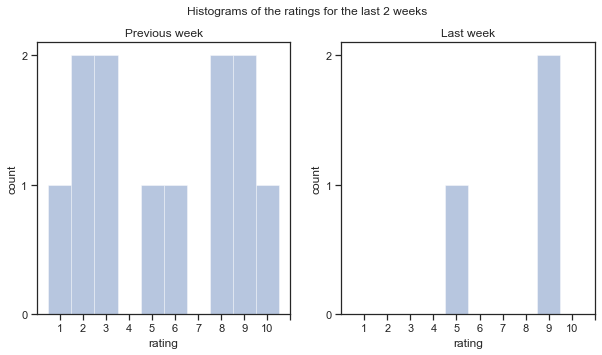

In [20]:
plotting.get_histograms(df)

The boxplots help to compare the summary statistics for last week vs the previous week.

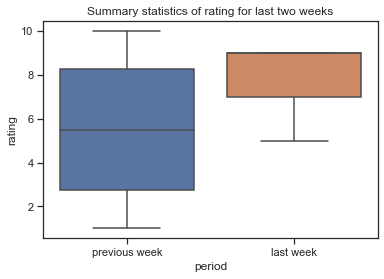

In [21]:
plotting.get_boxplot(df)

Some further statistics can be found in the below table.

In [22]:
display(data.get_statistics(df, report_to_date))

,minimum,maximum,median,mean,count,count_with_rating,count_with_feedback
last_week,5.0,9.0,9.0,7.666667,4,3,2
last_two_weeks,1.0,10.0,6.0,5.933333,16,15,14
last_four_weeks,1.0,10.0,6.0,5.933333,16,15,14


The word cloud below contains the most common words from the feedbacks from the last week. Bigger font size indicates higher frequency of that word in the feedbacks. The feedback texts were preprocessed and lemmatized.

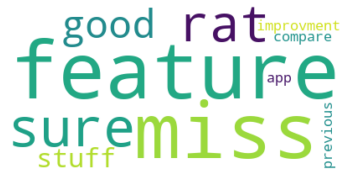

In [23]:
feedback_text = ' '.join(feedback for feedback in df[df.period=='last week'].feedback.dropna())
lemmas = text_analysis.process_text(feedback_text)
text_analysis.create_wordcloud(' '.join(lemma for lemma in lemmas))